# Ali Foroozmand

# Homework 3

## Galton Board

The Galton Board also known as Bean Machine consist of an upright board with evenly spaced nails or pegs. In the middle of the upper edge, there is a funnel into which balls can be poured, where the diameter of the balls must be much smaller than the distance between the nails. The funnel is located precisely above the central nail of the second row so that each ball, if perfectly centered, would fall vertically and directly onto the uppermost point of this nail's surface (Kozlov and Mitrofanova 2002). 

Each time a ball hits one of the nails, it can bounce right (or left) with some probability $p$ (and $q=1-p$). For symmetrically placed nails, balls will bounce left or right with equal probability, so $p=q=0.5$. If the number of balls is sufficiently large and $p=q=0.5$, then according to the weak law of large numbers, the distribution of the heights of the ball heaps will approximate a normal distribution.

![alt](GaltonBoard.png)

### Question 1: Make a program that simulates a Galton Board. That is, take an *i* amount of balls and have them go through *N* rows of pegs going left or right with probabilities *p=q=0.5*, respectively. To visualize the results, make a histogram with the amount of balls that landed in each bin.

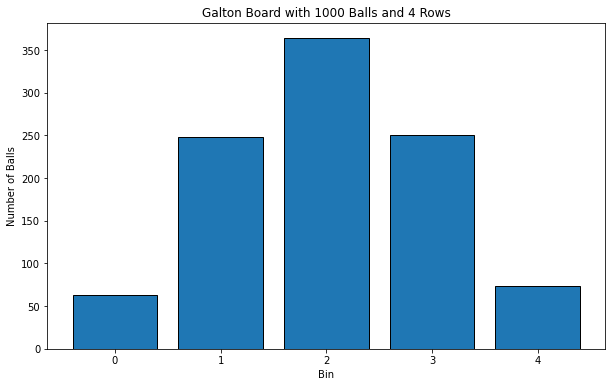

In [1]:
import random
import matplotlib.pyplot as plt



def galton_board(i, N):
    
    bins = [0] * (N + 1)
    for _ in range(i):
        position = 0
        for _ in range(N):
            position += random.choice([0, 1])
        bins[position] += 1
    return bins




i = 1000 
N = 4   

result_bins = galton_board(i, N)



plt.figure(figsize=(10, 6))
plt.bar(range(len(result_bins)), result_bins, edgecolor='black')
plt.title(f'Galton Board with {i} Balls and {N} Rows')
plt.xlabel('Bin')
plt.ylabel('Number of Balls')
plt.xticks(range(len(result_bins)))
plt.show()


### Question 2: Play with the values of the variables, change the probabilities and the amount of balls. Make 4 plots with the parameters used, and discuss how it changes in each case.

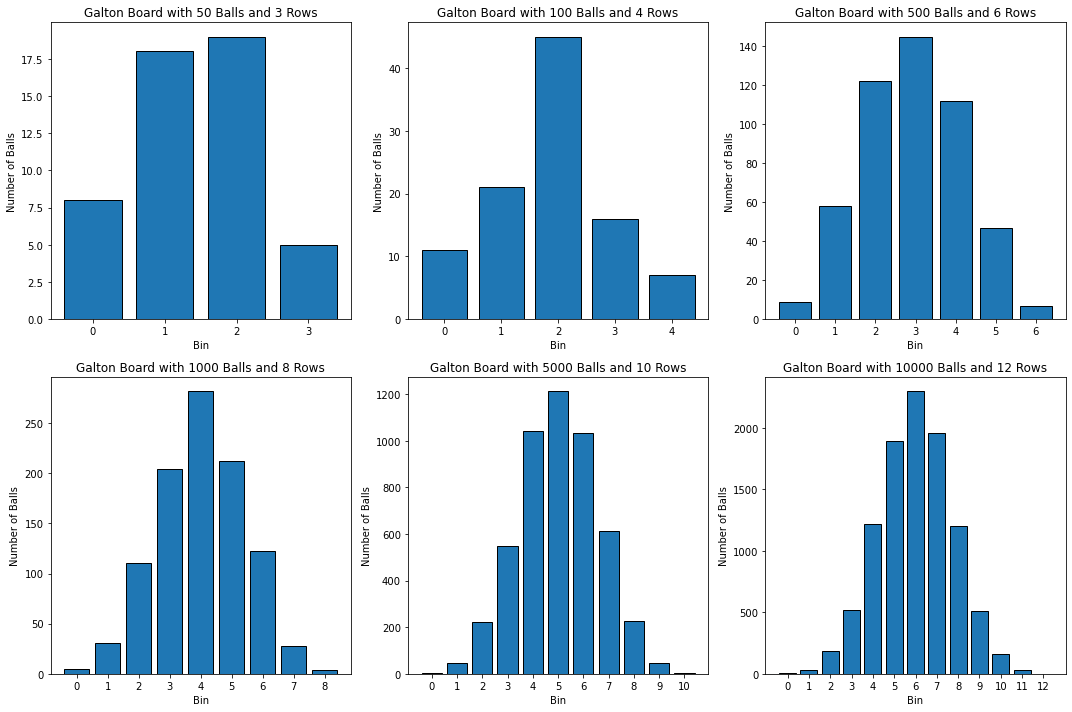

In [2]:
N_list = [3 ,4, 6, 8, 10, 12] 
i_list = [50,100, 500, 1000, 5000, 10000] 


fig, axes = plt.subplots(2, 3, figsize=(15, 10))


axes = axes.flatten()


for idx, (N, i) in enumerate(zip(N_list, i_list)):
    result_bins = galton_board(i, N)
    
    
    axes[idx].bar(range(len(result_bins)), result_bins, edgecolor='black')
    axes[idx].set_title(f'Galton Board with {i} Balls and {N} Rows')
    axes[idx].set_xlabel('Bin')
    axes[idx].set_ylabel('Number of Balls')
    axes[idx].set_xticks(range(len(result_bins)))


plt.tight_layout()
plt.show()

### Question 3: What is the probability that in a board with N=10 rows, a ball takes n=9 turns to the right? How about n=5 turns to the right?

In [3]:
from scipy.stats import binom

# for a ball takes n = 9 in N=10, it should success in 9 times so:


n = 10   
p = 0.5  
k = 9 

binomial_prob = binom.pmf(k, n, p)

print(f"The probability for n=9 is: {(binomial_prob*100)} %")

# for a ball takes n = 9 in N=10, it should success in 9 times so:

n = 10   
p = 0.5  
k = 5

binomial_prob = binom.pmf(k, n, p)

print(f"The probability for n=5 is: {(binomial_prob*100)} %")


The probability for n=9 is: 0.9765625000000002 %
The probability for n=5 is: 24.609375000000004 %


## Poisson Distribution

### Question 1: In Sydney, early morning customers arrive at a newspaper stand at Wynyard Station at an average rate of 2 per minute after the morning rush stars at 7 am (defined as t=0). Determine the probability that no customers arrive to purchase a newspaper during an early morning period of: 1 minute, 2 minutes, 30 seconds.

In [4]:
import numpy as np
import math

def poisson(lam, t, k):
    
    return ((lam*t)**k) * (np.exp(-lam*t))/ math.factorial(k)

In [5]:
print (f"the probability that no customers arrive to purchase a newspaper  during t = 1 min is: {poisson(2, 1 , 0)}")
print (f"the probability that no customers arrive to purchase a newspaper  during t = 2 min is: {poisson(2, 2 , 0)}")
print (f"the probability that no customers arrive to purchase a newspaper  during t = 0.5 min is: {poisson(2, 0.5 , 0)}")

the probability that no customers arrive to purchase a newspaper  during t = 1 min is: 0.1353352832366127
the probability that no customers arrive to purchase a newspaper  during t = 2 min is: 0.01831563888873418
the probability that no customers arrive to purchase a newspaper  during t = 0.5 min is: 0.36787944117144233


### Question 2: Make a Python routine where time is a parameter given to the program through input and then returns the probability.

In [7]:
import numpy as np

def poisson_t(lam, t):
    return np.exp(-lam * t)
lam = 2

t = float(input("Enter the time interval in minutes: "))

probability_no_person = poisson_t(lam, t)

print(f"Probability of no customers arriving in {t} minutes: {probability_no_person:.4f}")


Enter the time interval in minutes: 2
Probability of no customers arriving in 2.0 minutes: 0.0183


### Question 3: What is the mean and the standard deviation in this example?

In [8]:
# the mean of the poisson distribution is Lambda 
# the variance of the poisson distribution is also Lambda 
# the standard deviation is sqrt variance 
# so :

print (f"the mean is : {lam} ")
print (f"the variance is : {lam} ")
print (f"the standard deviation is : {np.sqrt(lam)} ")

the mean is : 2 
the variance is : 2 
the standard deviation is : 1.4142135623730951 


### Question 4: Why is the Poisson distribution adequate for this example?

# These are the theory reasons :

1) Constant Average Rate of Events: The average customer arrival rate is specified as 2 customers per minute. 
   The Poisson distribution is commonly used when events occur at a known, constant average rate, like in this        scenario.

2) Independence of Arrivals: The arrival of each customer is independent of others; one customer's arrival 
   doesn’t influence the arrival of the next. This aligns with a key Poisson assumption that 
   events occur independently within each interval.

3) Discrete Event Counting Over Continuous Time: The Poisson distribution models 
   the probability of a discrete number of events (such as customer arrivals) occurring within a continuous time 
   interval. Here, we're counting the number of customer arrivals over intervals of 1 minute, 2 minutes, and 30        seconds.



# Also, we can show in chart with random number and Poisson simulation.

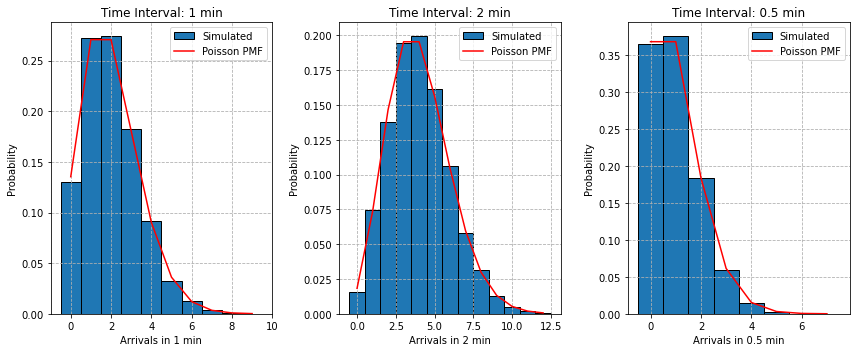

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


lam = 2 
time_intervals = [1, 2, 0.5] 
N = 10000 

plt.figure(figsize=(12, 5))

for i, interval in enumerate(time_intervals):
  
    ad_lam = lam * interval
    arrivals = np.random.poisson( ad_lam, N)

    max_arrivals = arrivals.max()
    k_values = np.arange(0, max_arrivals + 1)
    poisson_pmf = poisson.pmf(k_values, ad_lam)


    plt.subplot(1, len(time_intervals), i + 1)
    plt.hist(arrivals, bins=np.arange(-0.5, max_arrivals + 1, 1), density=True, edgecolor='black', label="Simulated")
    plt.plot(k_values, poisson_pmf, '-', color='red', label="Poisson PMF")
    plt.xlabel(f"Arrivals in {interval} min")
    plt.ylabel("Probability")
    plt.title(f"Time Interval: {interval} min")
    plt.legend()
    plt.grid(True, linestyle='--')

plt.tight_layout()
plt.show()


## Transformation Method

### Question 1: Write a Python program that generates random numbers which are distributed according to $f(x)=1-x/2$ in the interval $[0, 2]$ by using the transformation method (inverse transform sampling). Check by plotting a histogram.

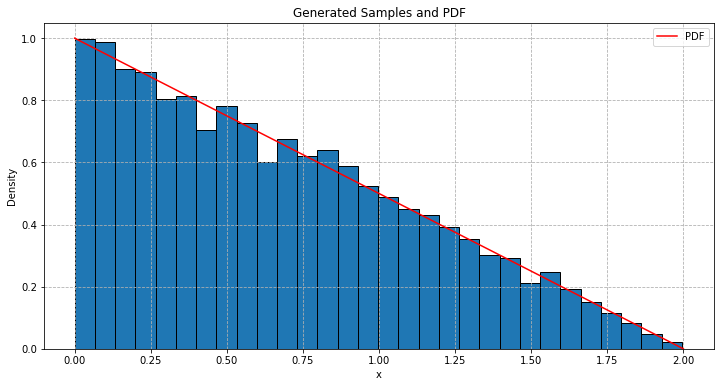

In [10]:

num_samples = 10000

u = np.random.uniform(0, 1, num_samples) # random samples
x_samples = 2 - 2*np.sqrt(1 - u) # the inverse transform sampling method

plt.figure(figsize=(12, 6))
plt.hist(x_samples, bins=30, density=True, edgecolor='black')

x = np.linspace(0, 2, 1000)
pdf = 1 - x / 2
plt.plot(x, pdf, color='red', label='PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Generated Samples and PDF')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()
